## Introduction

This is a notebook that I used to create maps from a Landsat-based dataset that documents forest cover change in Eastern Europe between 1985 and 2012. The dataset can be downloaded here: http://glad.geog.umd.edu/europe/; it was put together by scientists at the University of Maryland -- for more detail, see this paper: http://dx.doi.org/10.1016/j.rse.2014.11.027. The notebook forms the basis of this blog post: http://hinderedsettling.com/2015/07/18/forest-cover-change-in-the-carpathians-since-1985/. You need to have the GDAL package installed to run the analysis below.

In [225]:
import gdal
from gdalconst import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# function for making custom colormap (from Stackexchange)
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

## Load data

In [83]:
dataset = gdal.Open('dynamics_type.img', GA_ReadOnly )
band = dataset.GetRasterBand(1)
cols = dataset.RasterXSize
rows = dataset.RasterYSize
bands = dataset.RasterCount
driver = dataset.GetDriver().LongName
data = band.ReadAsArray(0, 0, cols, rows)
np.shape(data)

## Create and display maps

The dataset used here includes the following categories:
1. stable non-forest; 
2. stable forest; 
3. forest gain over non-forest in 1985; 
4. forest loss; 
5. forest loss followed by forest gain; 
6. repeated forest loss separated by forest gain; 
7. forest loss on areas which gain forest cover after non-forest state in 1985.

### Whole Carpathian area

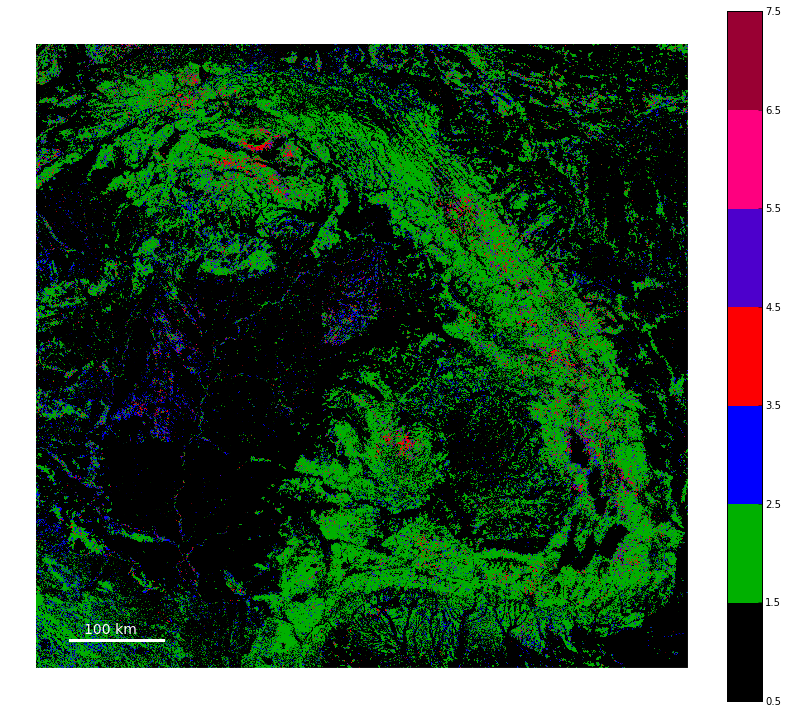

In [249]:
carps = data[79000:101500:5,13500:37000:5]
cmap = tuple([[0,0,0],[0.0,0.7,0.0],[0,0,1],[1,0,0],[0.3,0,0.8],[1,0,0.5],[0.6,0,0.2]])
cmap = make_cmap(cmap)
plt.figure(figsize=(12,10))
bounds = np.linspace(0.5,7.5,8)
plt.imshow(carps, cmap=cmap,interpolation=None)
plt.colorbar(boundaries=bounds)
plt.plot([250,250+666.7],[4300,4300],'w',linewidth=3)
plt.text(250+100,4250,'100 km',color='w',fontsize=14)
plt.axis('off')
plt.xlim(0,np.shape(carps)[1])
plt.ylim(np.shape(carps)[0],0)
plt.tight_layout()

### Bend area

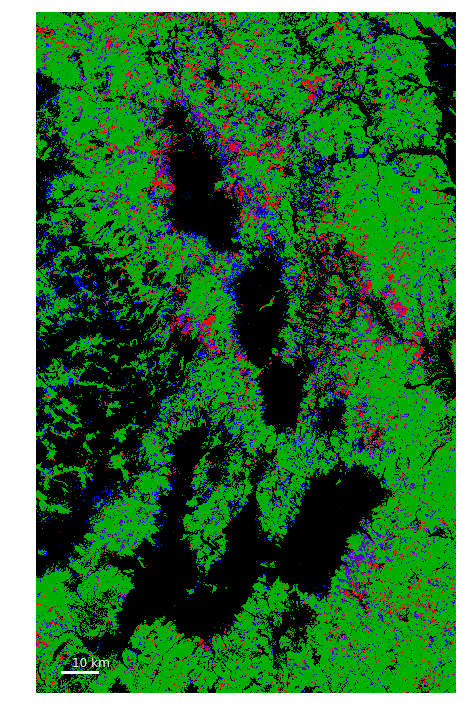

In [252]:
bend = data[92000:98500,31500:35500]
plt.figure(figsize=(12,10))
bounds = np.linspace(0.5,7.5,8)
plt.imshow(bend, cmap=cmap,interpolation=None)
plt.plot([250,250+333],[6300,6300],'w',linewidth=3)
plt.text(250+100,6250,'10 km',color='w',fontsize=12)
plt.axis('off')
plt.xlim(0,np.shape(bend)[1])
plt.ylim(np.shape(bend)[0],0)
plt.tight_layout()

### Csik area

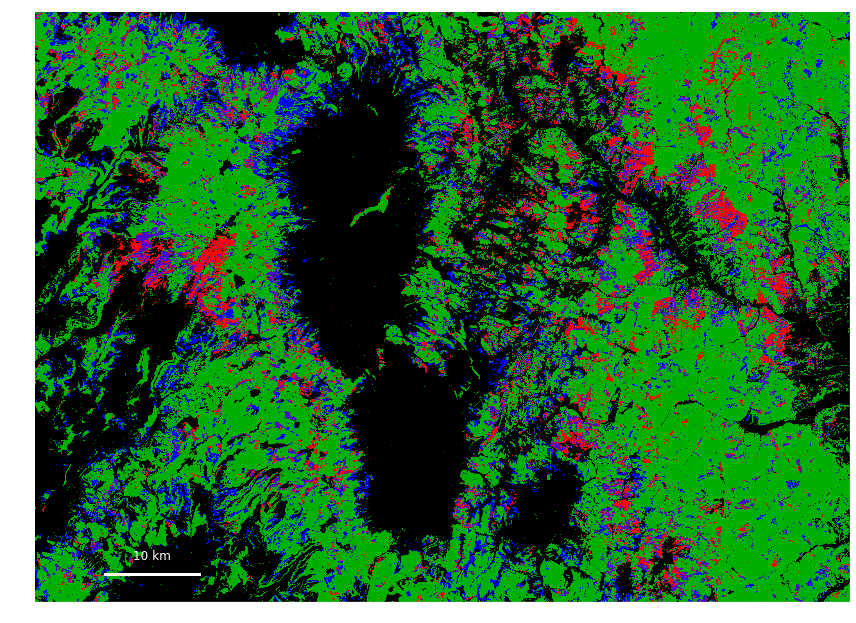

In [255]:
csik = data[94100:96200,32500:35400]
plt.figure(figsize=(12,10))
bounds = np.linspace(0,7,7)
plt.imshow(csik, cmap=cmap,interpolation=None)
plt.plot([250,250+333],[2000,2000],'w',linewidth=3)
plt.text(250+100,1950,'10 km',color='w',fontsize=12)
plt.axis('off')
plt.xlim(0,np.shape(csik)[1])
plt.ylim(np.shape(csik)[0],0)
plt.tight_layout()

### Csik area zoom-in

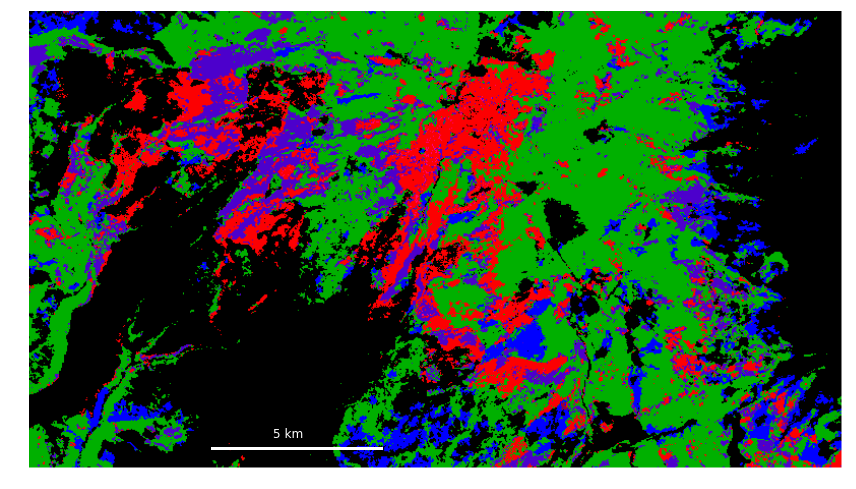

In [258]:
csik_zoom = data[94850:95300,32700:33500]
plt.figure(figsize=(12,10))
bounds = np.linspace(0,7,7)
plt.imshow(csik_zoom, cmap=cmap,interpolation=None)
plt.plot([180,180+333/2.0],[430,430],'w',linewidth=3)
plt.text(180+60,420,'5 km',color='w',fontsize=12)
plt.axis('off')
plt.xlim(0,np.shape(csik_zoom)[1])
plt.ylim(np.shape(csik_zoom)[0],0)
plt.tight_layout()